Loading data


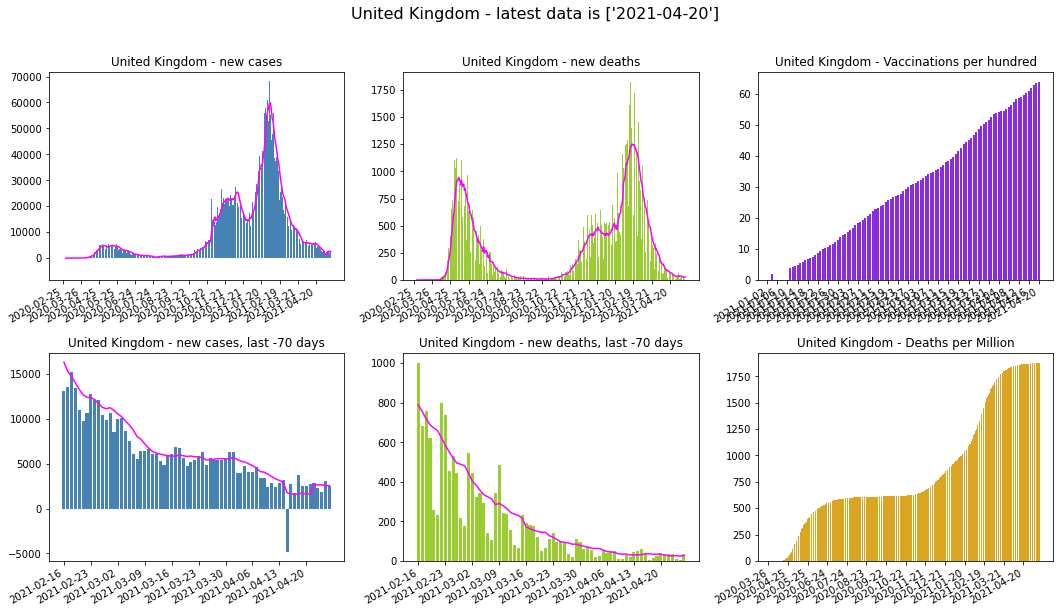

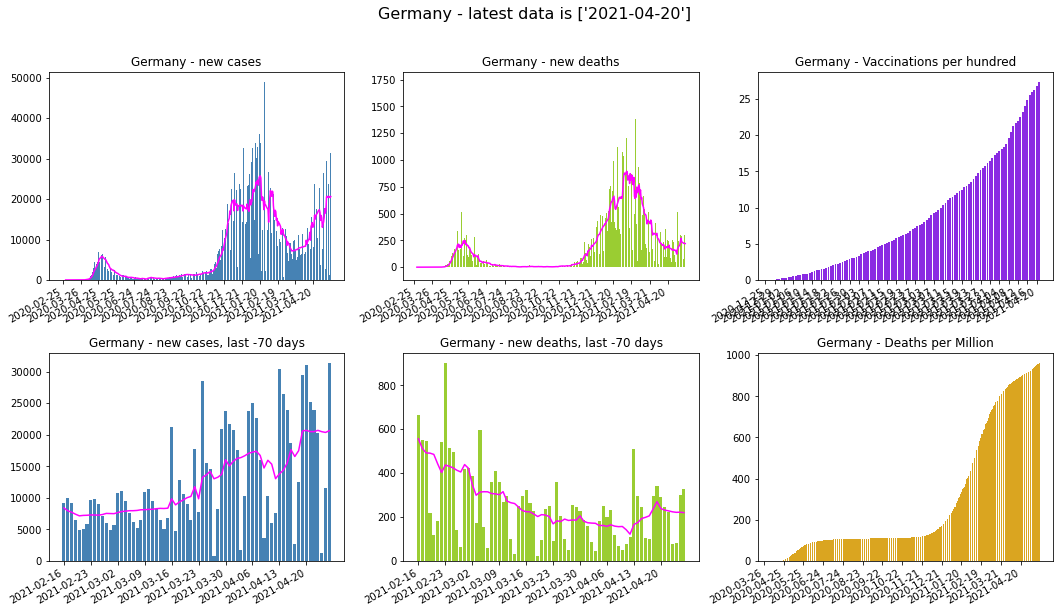

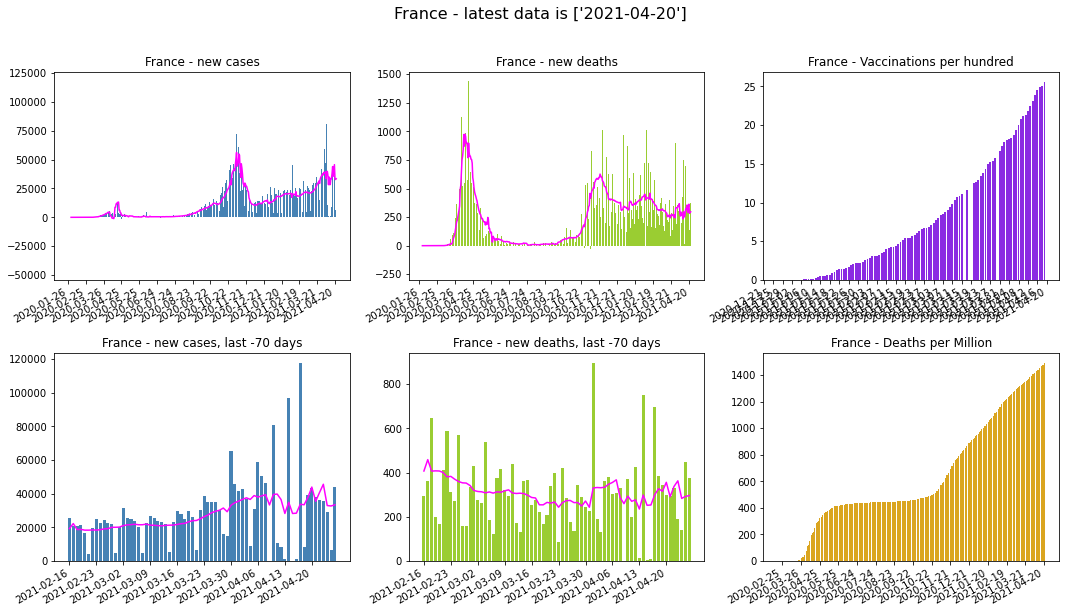

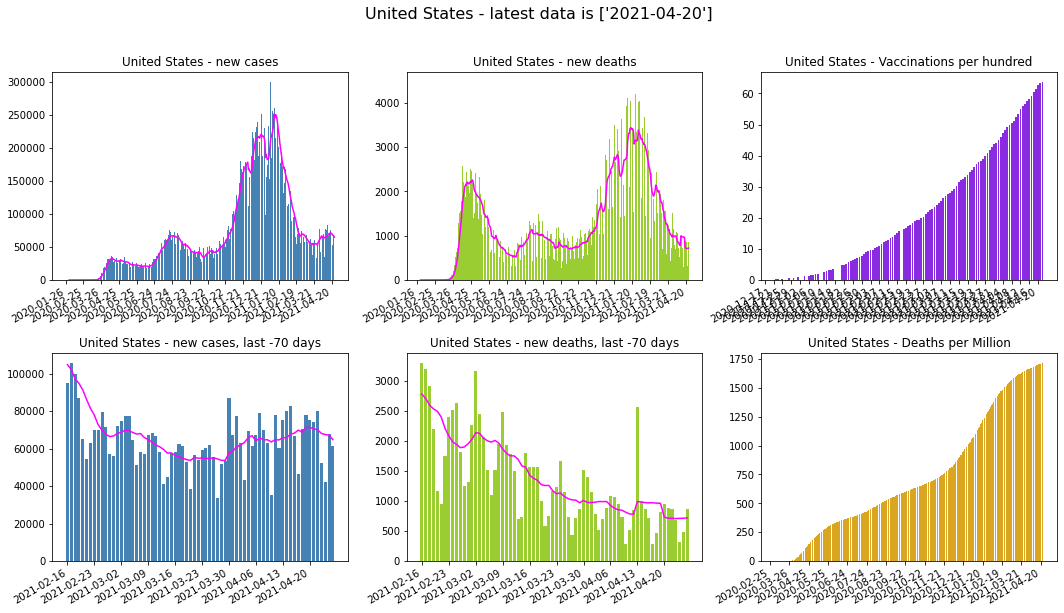

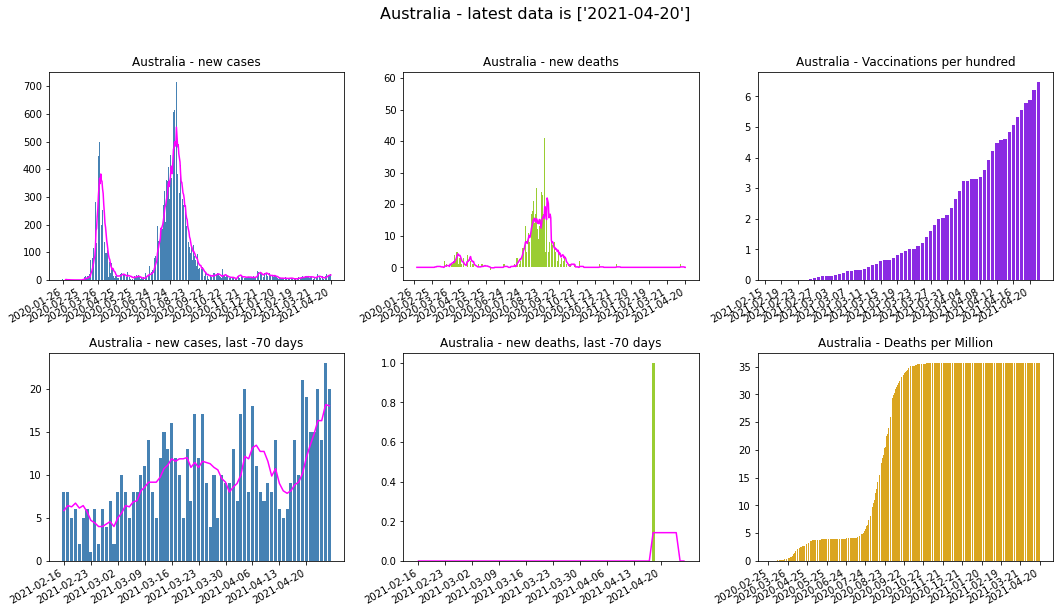

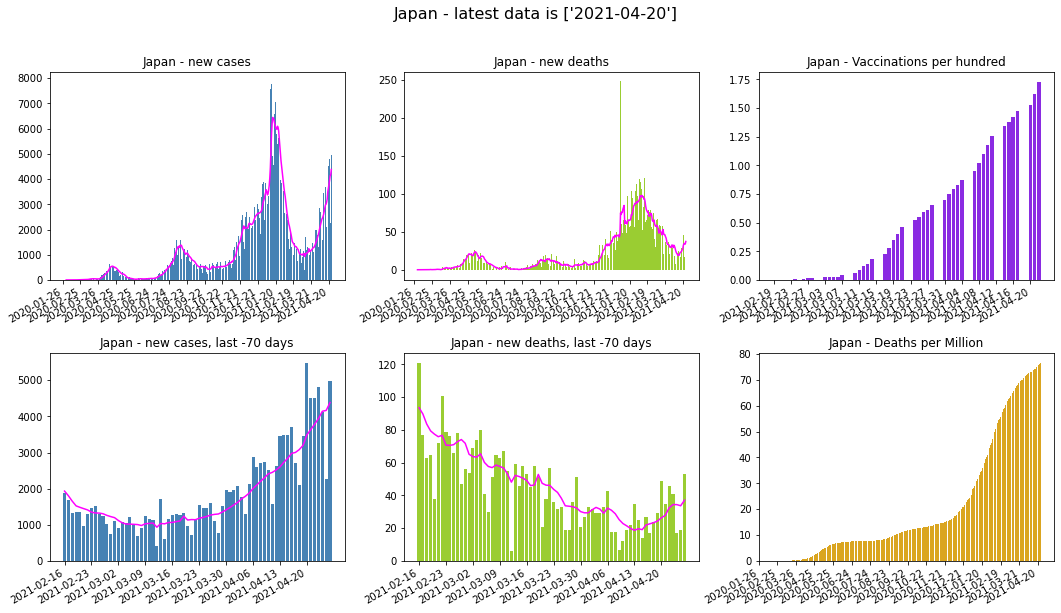

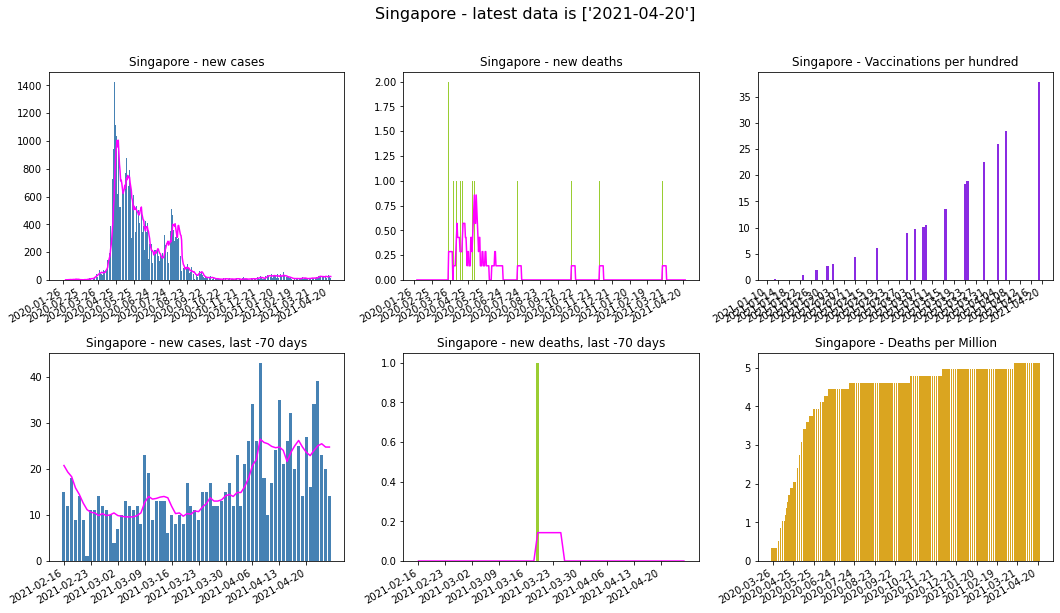

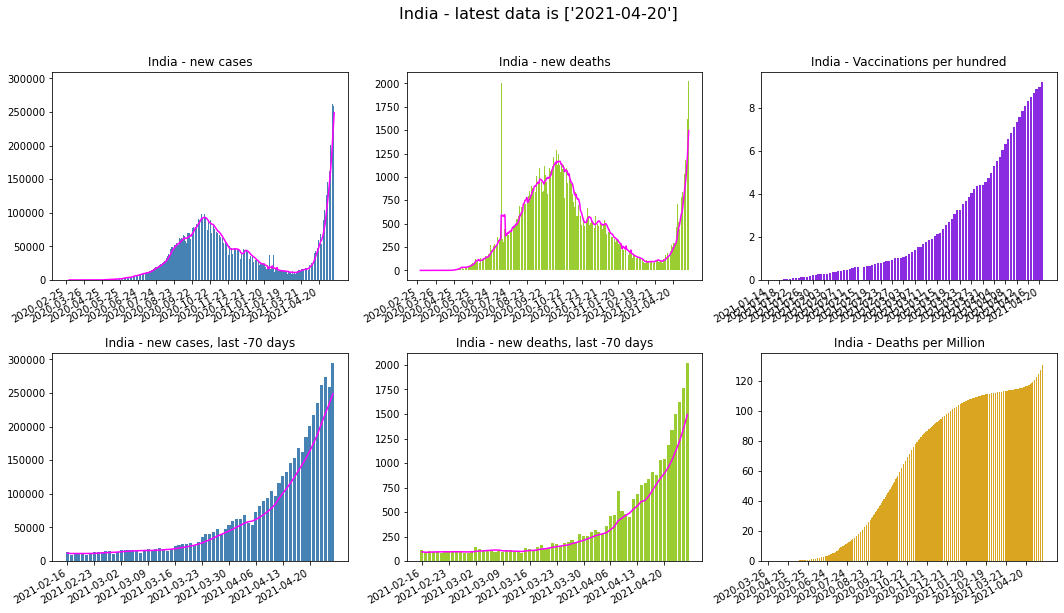

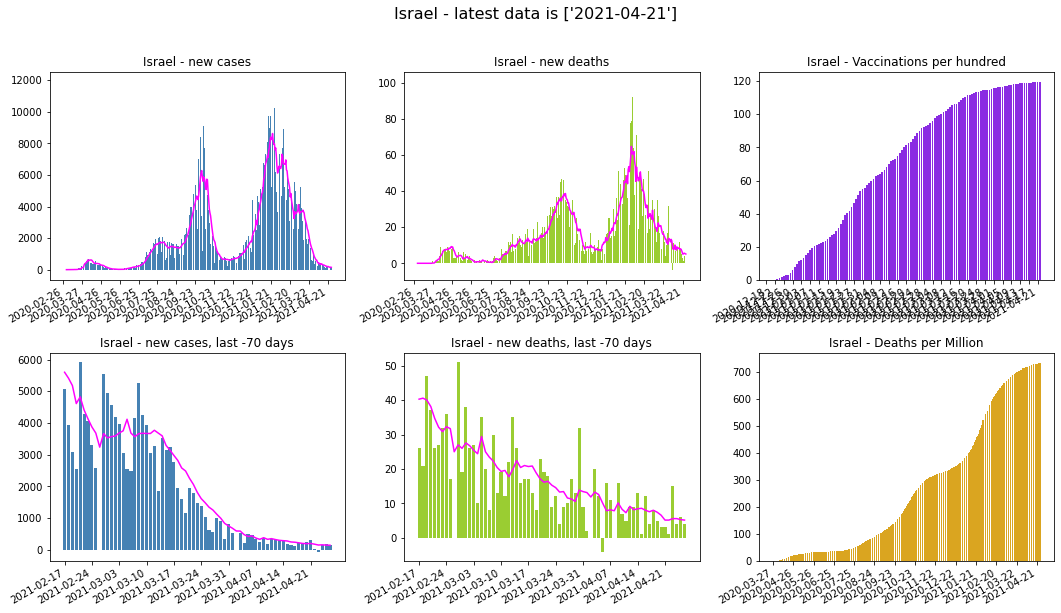

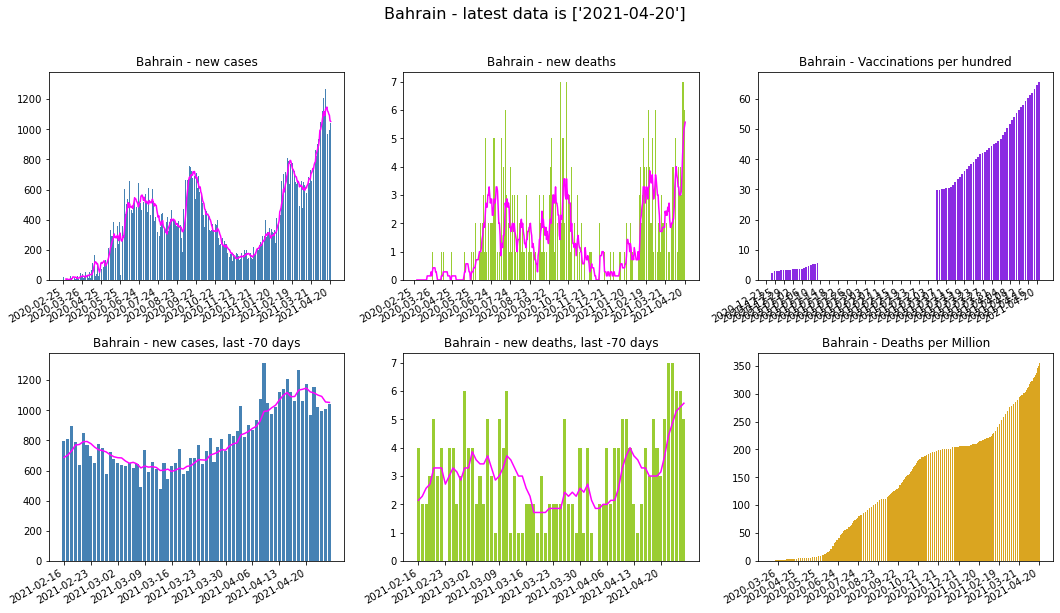

In [1]:
# Data from https://covid.ourworldindata.org/data/owid-covid-data.csv

import pandas as pd
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from pathlib import Path

downloads = f'{Path.home()}\\Downloads'

ageData = dt.timedelta(hours=1, minutes=0)    # this sets up how old the data can be before we load it again.
try:
    if dataStamp + ageData < dt.datetime.today():
        load = True
        print('Data will be reloaded')
    else:
        load = False
        print(f'Data already loaded: {dataStamp.strftime("%b-%d %H:%M")}')
except:
    load = True

# Load the data
if load:
    print('Loading data')
    df = pd.read_csv('https://github.com/owid/covid-19-data/raw/master/public/data/owid-covid-data.csv')
#    df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
    
    dataStamp = dt.datetime.today()

df.sort_values(by = 'date', inplace=True)    # Make sure it is in date order.

xrot = 30    # this just shifts the date labels so they can be read

# list the iso country codes that we want to report on
for country in ['GBR', 'DEU', 'FRA', 'USA', 'AUS', 'JPN', 'SGP', 'IND', 'ISR', 'BHR']:
    df1 = df[df.iso_code == country]    # subset the data
    for name in df[df.iso_code == country]['location'][0:1]:
        pass     # just pass the name back
    x = []    # setup an empty array for the X values
    for date in df1.date.tolist():    # pop each date into the x-axis
        x.append(date)
    
    plt.rcParams["figure.figsize"] = (18,9)    # Create the Plot size
    fig , ax = plt.subplots(2,3)    # Create the plot space
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.35) # add horizontal spacing
    fig.suptitle(f"{name} - latest data is {x[-1:]}", fontsize=16)    # title the figure
    
    ticks = []    # empty array of tick positions
    i, step = 0, 30    # we use i as the tick position and step as how many to skip so we space the labels out
    for tick in x[::step]:    # loop through and slice each step
        ticks.append(i)    # add the position number to the array
        i += step    # increment the tick position
    y1 = df1.new_cases    # set the y axis values
    y2 = df1.new_cases_smoothed
    y3 = df1.new_deaths
    y4 = df1.new_deaths_smoothed
    y5 = df1.total_vaccinations_per_hundred
    y6 = df1.total_deaths_per_million
    
    plt.subplot(231)    # top left
    plt.title(f"{name} - new cases")
#    plt.xticks(ticks, x[::step], rotation=xrot)
    plt.xticks(ticks, x[ -(len(ticks)-1)*step-1  ::step], rotation=xrot, ha='right')
    plt.bar(x, y1, color='steelblue')
    plt.plot(x, y2, color='magenta')

    plt.subplot(232)    # top centre
    plt.title(f"{name} - new deaths")
    plt.xticks(ticks, x[ -(len(ticks)-1)*step-1  ::step], rotation=xrot, ha='right')
    plt.bar(x, y3, color='yellowgreen')
    plt.plot(x, y4, color='magenta')

    plt.subplot(236)    # bottom right
    plt.title(f"{name} - Deaths per Million")
    plt.xticks(ticks, x[ -(len(ticks)-1)*step-1  ::step], rotation=xrot, ha='right')
    plt.bar(x, y6, color='goldenrod')

    ### This is for the vaccinations, as we have less data we need more frequent data labels. 
    ticks = []    # empty array of tick positions
    i, step = 0, 4    # we use i as the tick position and step as how many to skip so we space the labels out
    for tick in x[::step]:    # loop through and slice each step
        ticks.append(i)    # add the position number to the array
        i += step    # increment the tick position

    plt.subplot(233)    # top right
    plt.title(f"{name} - Vaccinations per hundred")
    plt.xticks(ticks, x[ -(len(ticks)-1)*step-1  ::step], rotation=xrot, ha='right')
#    plt.xticks(rotation=xrot)
    plt.bar(x, y5, color='blueviolet')

    ### This section just slices the same date but only the last 35 values
    recent = -70    # this sets the look back value
    i, step = 0, 7
    ticks = []
    for tick in x[recent::step]:
        ticks.append(i)
        i += step

    plt.subplot(234)    # bottom left
    plt.title(f"{name} - new cases, last {recent} days")
    plt.xticks(ticks, x[ -(len(ticks)-1)*step-1  ::step], rotation=xrot, ha='right')
    plt.bar(x[recent:], y1[recent:], color='steelblue')
    plt.plot(x[recent:], y2[recent:], color='magenta')

    plt.subplot(235)    # bottom centre
    plt.title(f"{name} - new deaths, last {recent} days")
    plt.xticks(ticks, x[ -(len(ticks)-1)*step-1  ::step], rotation=xrot, ha='right')
    plt.bar(x[recent:], y3[recent:], color='yellowgreen')
    plt.plot(x[recent:], y4[recent:], color='magenta')

    fig.savefig(f'{downloads}\\{country}_OWD.png')

ARG


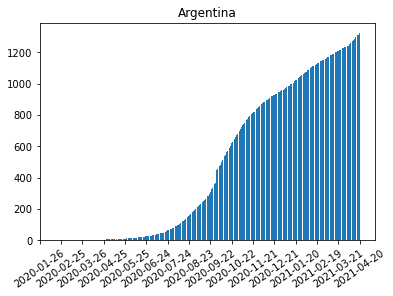

In [2]:
i = 0
for country in df.iso_code.unique():
    print(country)
    if pd.isna(country):
        pass
    else:
        df1 = df.loc[df.iso_code == country]
        plt.rcParams["figure.figsize"] = (6,4)
        plt.bar(df1.date, df1.total_deaths_per_million)
        plt.xticks(df1.date[-(df1.date.size//30) * 30 -1 ::30] ,  rotation=35)
        plt.title(df1.location.unique()[0])
        plt.show()
        i += 1
    if i == 1: break

In [3]:
for code in df.iso_code.unique():
    if not pd.isna(code):
        print(code)

ARG
MEX
THA
PER
TWN
KOR
OWID_ASI
CHN
OWID_NAM
USA
OWID_WRL
JPN
OWID_EUR
OWID_EUN
SGP
VNM
FRA
NPL
OWID_OCE
MYS
AUS
CAN
KHM
LKA
DEU
ARE
FIN
PHL
IND
FJI
GBR
HKG
RUS
ITA
ESP
SWE
PRT
DNK
CYP
SVN
BEL
MLT
OWID_INT
MAR
ZAF
EST
OWID_AFR
EGY
GTM
IRN
ISR
LBN
OWID_SAM
CHL
NOR
BHR
IRQ
LUX
KWT
OMN
AFG
PAK
CHE
DZA
ALB
HRV
AUT
MKD
GEO
SRB
BRA
ROU
GRC
SMR
NLD
ISL
NZL
BLR
NGA
SEN
IRL
MCO
QAT
LVA
LTU
ARM
ECU
DOM
CZE
AZE
IDN
AND
SAU
UKR
BGD
JOR
HUN
POL
TGO
LIE
LBY
TUN
BIH
PSE
KEN
SVK
CMR
BTN
VAT
CRI
COL
PRY
BGR
MDV
MDA
BRN
PAN
MNG
BFA
TUR
COD
JAM
CIV
BOL
HND
SDN
CUB
GUY
KAZ
GIN
URY
ETH
ATG
VEN
GAB
SYC
MRT
OWID_KOS
NAM
SWZ
VCT
TTO
LCA
RWA
GHA
SUR
COG
CAF
UZB
GNQ
BEN
TZA
SOM
BHS
LBR
GMB
MNE
BRB
KGZ
DJI
ZMB
MUS
NIC
TCD
SLV
PNG
HTI
ZWE
CPV
MDG
NER
AGO
ERI
UGA
MOZ
TLS
DMA
SYR
GRD
BLZ
LAO
MLI
KNA
GNB
MMR
MWI
BWA
BDI
SLE
SSD
STP
YEM
TJK
COM
LSO
SLB
MHL
VUT
WSM
CYM
BMU
TCA
GIB
OWID_CYN
FSM
IMN
GGY
JEY
GRL
FRO
SHN
AIA
FLK
MAC
MSR
CUW
NRU
TON
ABW


In [4]:
df = df.loc[df.iso_code != 'OWID_WRL']
for item in ['total_vaccinations_per_hundred', 'total_deaths_per_million', 'total_cases_per_million',
            'icu_patients_per_million', 'total_tests_per_thousand', 'new_deaths_per_million']:
    print('####')
    print(df.loc[df[item].idxmax()][['location',item]])

####
location                          Gibraltar
total_vaccinations_per_hundred       198.01
Name: 29730, dtype: object
####
location                     Czechia
total_deaths_per_million    2674.391
Name: 19818, dtype: object
####
location                      Andorra
total_cases_per_million    166621.368
Name: 2111, dtype: object
####
location                    Czechia
icu_patients_per_million    192.735
Name: 19783, dtype: object
####
location                    Slovakia
total_tests_per_thousand    5750.593
Name: 67461, dtype: object
####
location                  Ecuador
new_deaths_per_million    218.329
Name: 22069, dtype: object


In [5]:
df.loc[df.iso_code == 'GBR'][['date','new_deaths']].sort_values(by=['new_deaths'], ascending=False)[:5]

,date,new_deaths
78580,2021-01-20,1826.0
78587,2021-01-27,1726.0
78586,2021-01-26,1636.0
78579,2021-01-19,1612.0
78573,2021-01-13,1568.0


In [6]:
df.loc[df.iso_code == 'GBR'][['date','new_cases']].sort_values(by=['new_cases'], ascending=False)[:5]

,date,new_cases
78568,2021-01-08,68192.0
78566,2021-01-06,62556.0
78565,2021-01-05,61087.0
78569,2021-01-09,60098.0
78564,2021-01-04,58923.0


In [7]:
i = df.loc[df.iso_code == 'DNK'].last_valid_index()
df.loc[i]

iso_code                             DNK
continent                         Europe
location                         Denmark
date                          2021-04-20
total_cases                    244759.00
                                 ...    
male_smokers                       18.80
handwashing_facilities               NaN
hospital_beds_per_thousand          2.50
life_expectancy                    80.90
human_development_index             0.94
Name: 20668, Length: 59, dtype: object

In [8]:
EU_Countries = df.loc[df.continent == 'Europe']['location'].unique()

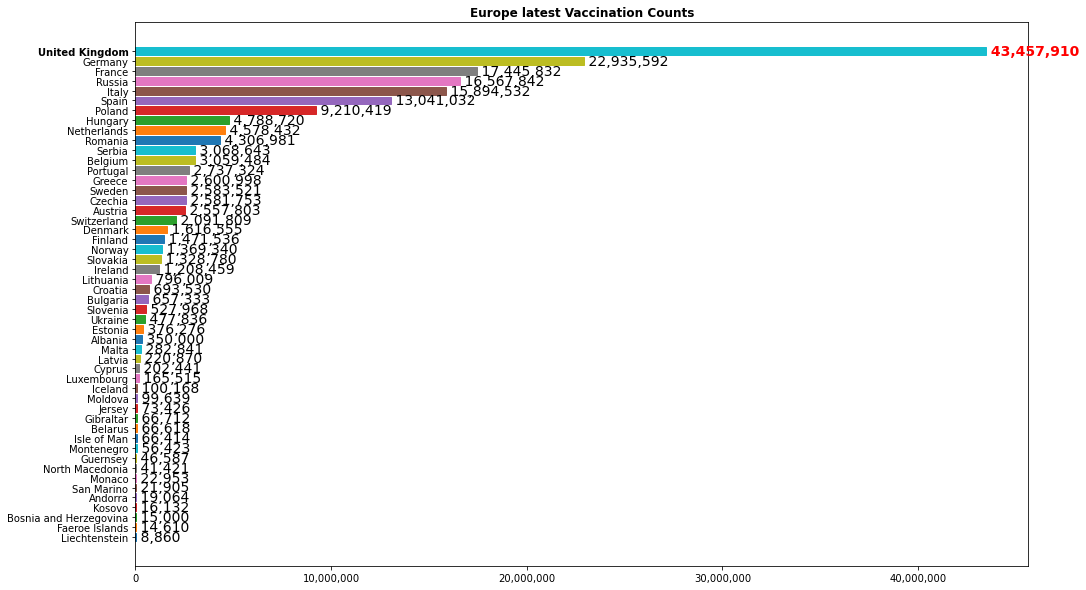

In [9]:
## Function to report on EU countries in order for whichever item is given

## First we need a simple formatter to reformat the text value of the numbers ont he x-axis
def format_func(value, tick_number):
    return(f'{value:,.15g}')


## Next we need the function that sorts the country data and makes the chart
## receive the list of countries, the DataFrame, the reporting label we are grpahing and the title of teh chart
def EU_order(EU_Countries, df, label, title):
    x = []    # create an empty list for the x values
    y = []    # create an empty list for the y values
    for country in EU_Countries:
        idx = df.loc[df.location == country][label].last_valid_index()    # get the index location that matches the highest result
        if idx:    # sometimes it's a None value reuslt from the above so only do when a valid index was returned
            val = df.loc[idx][label]    # get the value
            x.append(country)    # add to the x list
            y.append(val)    # add to the y list

    newdf = pd.DataFrame( {'country': x, 'counter': y})    # bang the x and y back into a dataframe so that we can
    newdf.sort_values(by='counter', inplace=True, ignore_index=True)    # sort it ready for charting

    fig, ax = plt.subplots(figsize = (16,10))    # set a new figure up

    # create an array with each of the bars in - this also create the horizontal bars on the chart
    bars = ax.barh( newdf['country'], newdf['counter'] )    # charting the country and the counter value
    UK_row = newdf.index[newdf['country'] == 'United Kingdom'].tolist()[0]    # now we need to find where is the UK data
    ax.get_yticklabels()[UK_row].set_weight('bold')    # setting the UK tick label legend to bold
    ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))    # this is getting rid of the scientific number values
    i = 0    # set a counter
    for bar in bars:    # iterate the bars just so that we can annotate them with thier actual values on
        # set the format differently for the UK line
        col1, weigh = 'k', 'normal'
        if UK_row == i: col1, weigh = 'r', 'bold'
        value = (newdf.loc[i]['counter'])    # use the counter to find the value from the DataFrame
        ax.annotate(f' {value:,.9g}',    # annotate the value and format the number
                   xy = ( (bar.get_x() + bar.get_width() ) , bar.get_y() ),    # get the position to pop the text on
                   fontsize = 14, color=col1, weight=weigh    # set the style
                   )
        bar.set_color(f'C{i}')    # set the color also using the counter
        i += 1

    plt.title(title, weight='bold')    # set the title

    plt.show()    # show it

    fig.savefig(f'{downloads}\\{label}_OWD.png')    # save a PNG file in the downloads folder

## Call the function to show the total vaccinations
EU_order(EU_Countries, df, 'total_vaccinations', 'Europe latest Vaccination Counts')

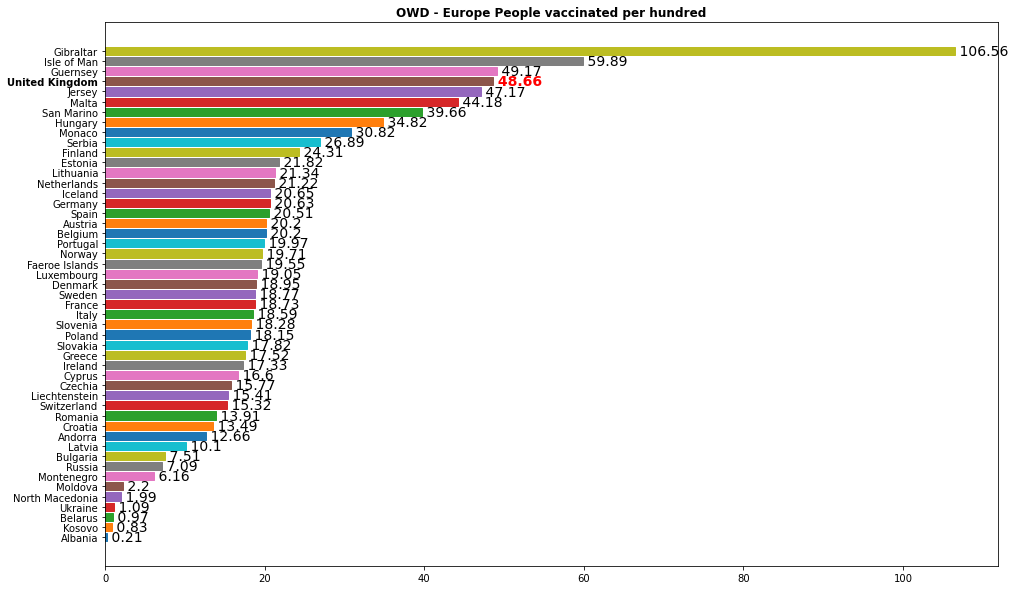

In [10]:
EU_order(EU_Countries, df, 'people_vaccinated_per_hundred', 'OWD - Europe People vaccinated per hundred')

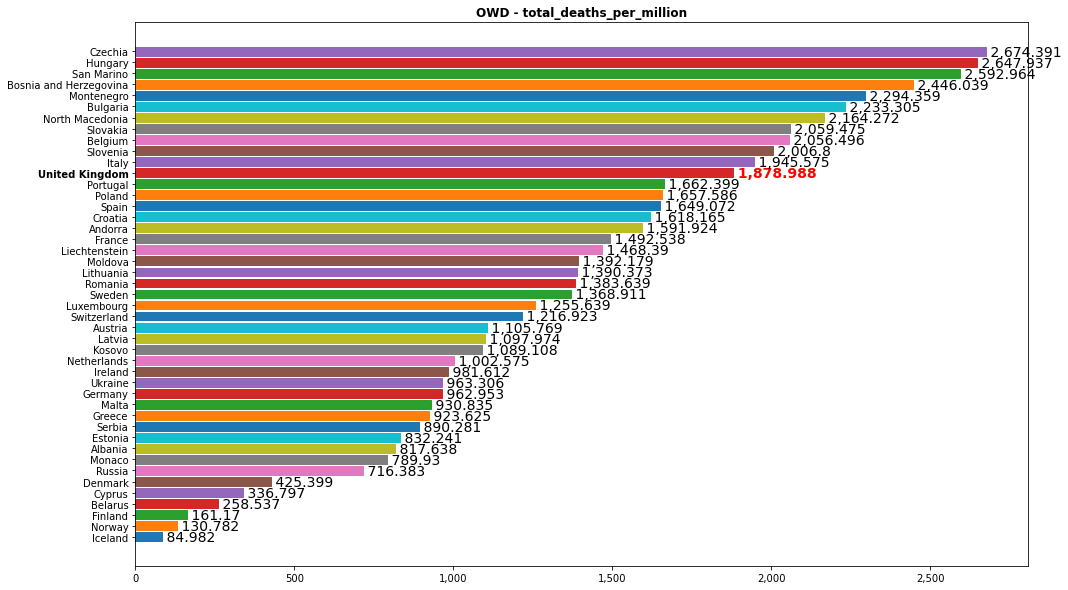

In [11]:
EU_order(EU_Countries, df, 'total_deaths_per_million', 'OWD - total_deaths_per_million')

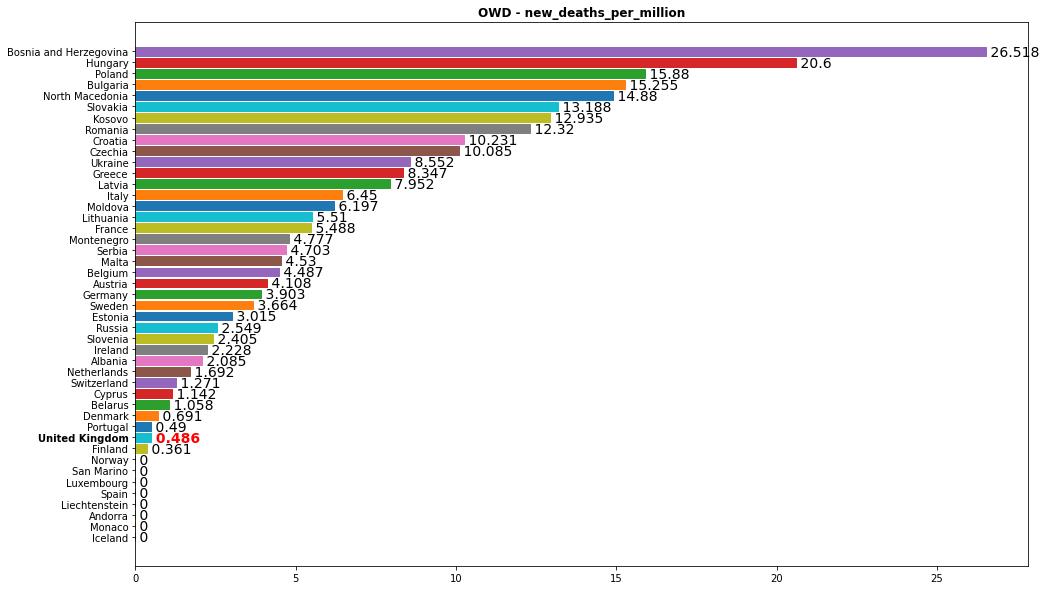

In [12]:

EU_order(EU_Countries, df, 'new_deaths_per_million', 'OWD - new_deaths_per_million')

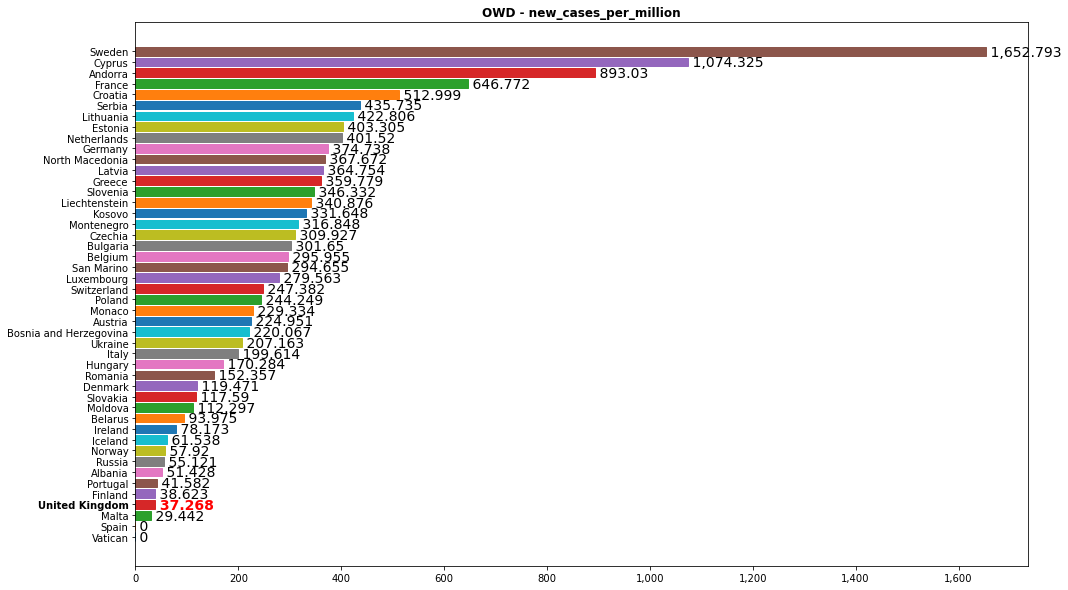

In [13]:
EU_order(EU_Countries, df, 'new_cases_per_million', 'OWD - new_cases_per_million')

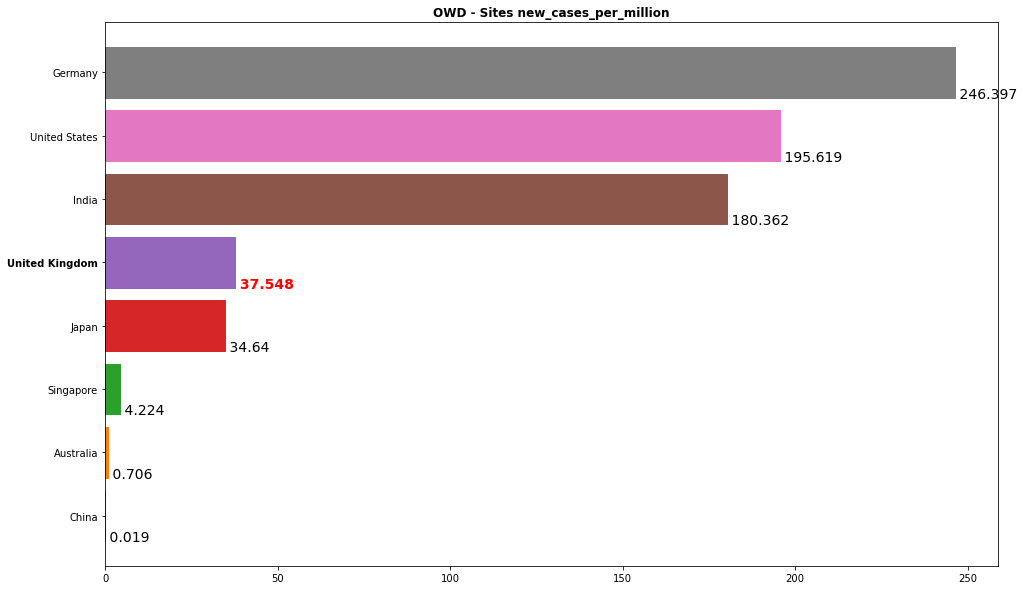

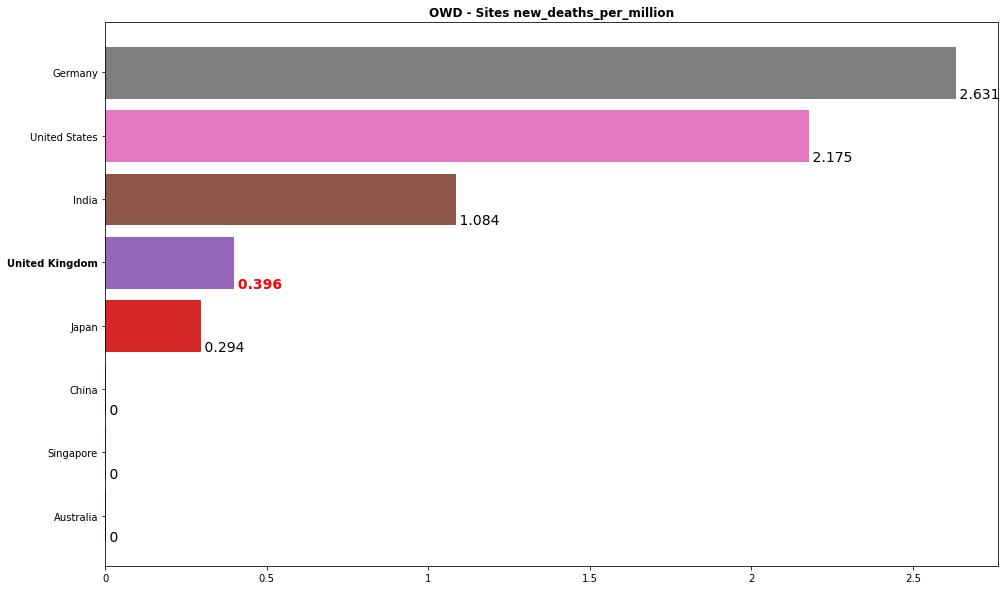

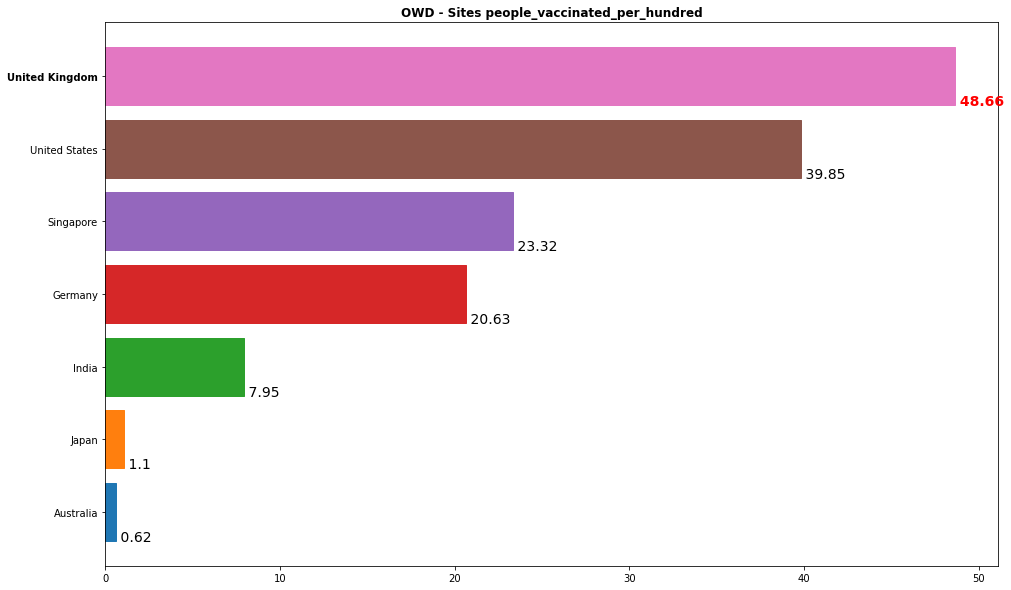

In [14]:
EU_Countries = ['Australia', 'Japan', 'India', 'United Kingdom', 'Singapore', 'Germany', 'United States', 'China']
EU_order(EU_Countries, df, 'new_cases_smoothed_per_million', 'OWD - Sites new_cases_per_million')
EU_order(EU_Countries, df, 'new_deaths_smoothed_per_million', 'OWD - Sites new_deaths_per_million')
EU_order(EU_Countries, df, 'people_vaccinated_per_hundred', 'OWD - Sites people_vaccinated_per_hundred')

In [15]:
x.index('United Kingdom')

ValueError: 'United Kingdom' is not in list

In [ ]:
idx = newdf.index[newdf['country'] == 'United Kingdom']
idx

In [ ]:
newdf.shape

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.loc[df.iso_code == 'DNK']

In [ ]:
df.shape

In [ ]:
pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 60)
a = df.loc[df.location == 'United Kingdom'].last_valid_index()
print(df.loc[a-3])

In [ ]:
df.loc[df.iso_code == 'GBR'][['new_cases', 'new_deaths']].hist()

In [16]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,...,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,8.062700e+04,80625.000000,79630.000000,71043.000000,71201.000000,79630.000000,80188.000000,80186.000000,79196.000000,70617.000000,70775.000000,79196.000000,66488.000000,8628.000000,8628.000000,10402.000000,10402.000000,731.000000,731.000000,1256.000000,1256.000000,3.791200e+04,3.763600e+04,37636.000000,37912.000000,...,8.049000e+03,7.383000e+03,5.330000e+03,6.791000e+03,1.309700e+04,8049.000000,7383.000000,5330.000000,13097.000000,70792.000000,8.199900e+04,76804.000000,74360.000000,73504.000000,73940.000000,74677.00000,50744.000000,75303.000000,76360.00000,58927.000000,58050.000000,37602.000000,68706.000000,78301.000000,75192.000000
mean,5.422913e+05,3892.640285,3878.580780,15386.101530,94.863120,83.849187,9582.059595,73.282944,73.270090,216.139231,1.490887,1.315655,1.020368,1045.361613,25.084253,4797.171505,169.543631,285.163963,21.054038,3999.655726,114.738287,4.207892e+04,5.660692e+06,214.913313,1.808579,...,8.560831e+06,5.554566e+06,2.819848e+06,2.656171e+05,1.440519e+05,11.992992,8.502351,4.653011,2712.138429,58.762721,8.637545e+07,348.170981,30.521768,8.775606,5.560217,19156.42724,13.364368,257.809319,7.80947,10.550934,32.638257,50.821035,3.032302,73.165319,0.727180
std,2.825141e+06,19358.949178,18844.311444,67301.534095,416.641753,376.954563,18489.736883,175.543110,148.801322,380.351066,3.983393,2.921227,0.358398,3018.732122,27.343472,12508.256554,211.307023,587.735270,37.807393,11744.296137,232.448891,1.569513e+05,2.580295e+07,463.503412,5.206952,...,3.117245e+07,1.799082e+07,9.043798e+06,9.046990e+05,6.032469e+05,20.515889,13.120505,9.258204,4757.534537,21.705069,3.916675e+08,1693.423073,9.141382,6.245832,4.264237,19865.61468,20.024374,119.064840,3.97957,10.433637,13.526606,31.939501,2.472322,7.571930,0.150512
min,1.000000e+00,-74347.000000,-6223.000000,1.000000,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,-76.445000,-10.921000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.391720e+05,0.000000e+00,0.000000,-23.010000,...,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,8.090000e+02,0.137000,15.100000,1.144000,0.526000,661.24000,0.100000,79.370000,0.99000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000
25%,8.730000e+02,2.000000,6.571000,43.000000,0.000000,0.000000,191.923250,0.168000,1.111000,6.581000,0.000000,0.000000,0.860000,25.000000,3.810750,106.000000,21.759250,9.407000,1.588000,58.281500,9.906250,1.403750e+03,1.183628e+05,10.701750,0.121000,...,5.439600e+04,4.673600e+04,2.350025e+04,3.074000e+03,9.340000e+02,0.900000,0.780000,0.380000,312.000000,44.440000,2.416664e+06,36.253000,22.000000,3.441000,2.034000,4466.50700,0.500000,167.295000,5.29000,1.900000,21.400000,19.351000,1.300000,67.440000,0.602000
50%,9.573000e+03,66.000000,80.714000,295.000000,2.000000,1.143000,1306.446000,7.214500,9.581000,36.601000,0.114000,0.131000,1.020000,153.000000,14.842000,668.50

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82534 entries, 2981 to 37195
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               82534 non-null  object 
 1   continent                              78968 non-null  object 
 2   location                               82534 non-null  object 
 3   date                                   82534 non-null  object 
 4   total_cases                            80627 non-null  float64
 5   new_cases                              80625 non-null  float64
 6   new_cases_smoothed                     79630 non-null  float64
 7   total_deaths                           71043 non-null  float64
 8   new_deaths                             71201 non-null  float64
 9   new_deaths_smoothed                    79630 non-null  float64
 10  total_cases_per_million                80188 non-null  float64
 11 

In [ ]:
df.to_parquet(f'{downloads}/df.parquet')
